<a href="https://colab.research.google.com/github/jefferjone/food-sales-prediction/blob/main/Project_1_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 02 Project 1_Part 3

Submitted by: Jefferjone Long-gat

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding Dojo/DATASET/Project/sales_predictions.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [38]:
df.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

In [39]:
#1) How many rows and columns

#df.info   - can also be used
df.shape   #shows you the (rows, columns) 

(8523, 12)

In [40]:
#2) What are the datatypes of each variable

df.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [41]:
#3) Are there duplicates? If so, drop any duplicates.
df[df.duplicated(keep = False)]  #No duplicates found

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [42]:
#4) Identify missing values.

#df.info

#missing = df['Outlet_Size'].isna()
#df.loc[missing]

df.isnull().sum()

#we have 2 columns that have missing values.
#Item_Weight and Outlet_Size


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [43]:
#5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

df_missing = df.loc[0:8522, :].fillna(0)
df_missing.isnull().sum()

#I considered replacing the null values with (0)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [44]:
#6) Confirm that there are no missing values after addressing them.

df_missing.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [45]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)

df.dtypes

#Check inconsistent data particularly the object 

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [46]:
#Check Item_Identifier
df['Item_Identifier'].value_counts() 

#NO INCONSISTENT DATA

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [47]:
#Check Item_Fat_Content
df['Item_Fat_Content'].value_counts() 

#Found Inconsistent data.
#Can be categorized only by 2 Inputs (Low Fat and Regular)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [48]:
#replacing LF with Low Fat

df.loc[df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
df['Item_Fat_Content'].value_counts() 

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [49]:
#replacing reg with Regular

df.loc[df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
df['Item_Fat_Content'].value_counts() 

Low Fat    5405
Regular    3006
low fat     112
Name: Item_Fat_Content, dtype: int64

In [50]:
#replacing low fat with Low Fat

df.loc[df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
df['Item_Fat_Content'].value_counts()

#Remaining data are categorized to Low Fat and Regular 

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [51]:
#Check Item_Fat_Content
df['Item_Type'].value_counts()

#No inconsistent data

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [52]:
#Check Item_Fat_Content
df['Outlet_Identifier'].value_counts()

#No inconsistent data

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [53]:
#Check Item_Fat_Content
df['Outlet_Size'].value_counts()

#No inconsistent data

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [54]:
#Check Item_Fat_Content
df['Outlet_Location_Type'].value_counts()

#No inconsistent data

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [55]:
#Check Item_Fat_Content
df['Outlet_Type'].value_counts()

#No inconsistent data

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [56]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

df.dtypes

#numerical columns
#1)Item_Weight
#2)Item_Visibility
#3)Item_MRP
#4)Outlet_Establishment_Year
#5)Item_Outlet_Sales

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [57]:
#1 Mean, Min, Max for Item_Weight
Item_Weight_Agg = df.groupby('Item_Identifier').agg({'Item_Weight': ['mean', 'min', 'max']})
print(Item_Weight_Agg)

                Item_Weight                
                       mean     min     max
Item_Identifier                            
DRA12                11.600  11.600  11.600
DRA24                19.350  19.350  19.350
DRA59                 8.270   8.270   8.270
DRB01                 7.390   7.390   7.390
DRB13                 6.115   6.115   6.115
...                     ...     ...     ...
NCZ30                 6.590   6.590   6.590
NCZ41                19.850  19.850  19.850
NCZ42                10.500  10.500  10.500
NCZ53                 9.600   9.600   9.600
NCZ54                14.650  14.650  14.650

[1559 rows x 3 columns]


In [58]:
#2 Mean, Min, Max for Item_Visibility
Item_Visibility_Agg = df.groupby('Item_Identifier').agg({'Item_Visibility': ['mean', 'min', 'max']})
print(Item_Visibility_Agg)

                Item_Visibility                    
                           mean       min       max
Item_Identifier                                    
DRA12                  0.031956  0.000000  0.068535
DRA24                  0.048062  0.039735  0.069909
DRA59                  0.134718  0.000000  0.223985
DRB01                  0.082126  0.081841  0.082367
DRB13                  0.008002  0.007038  0.011791
...                         ...       ...       ...
NCZ30                  0.024956  0.000000  0.043828
NCZ41                  0.051623  0.000000  0.064786
NCZ42                  0.009044  0.000000  0.011352
NCZ53                  0.027775  0.024359  0.040970
NCZ54                  0.080426  0.000000  0.145952

[1559 rows x 3 columns]


In [59]:
#3 Mean, Min, Max for Item_MRP
Item_MRP_Agg = df.groupby('Item_Identifier').agg({'Item_MRP': ['mean', 'min', 'max']})
print(Item_MRP_Agg)

                   Item_MRP                    
                       mean       min       max
Item_Identifier                                
DRA12            141.865400  140.3154  143.0154
DRA24            164.086800  162.4868  165.7868
DRA59            185.179900  183.2924  186.6924
DRB01            189.586333  187.7530  190.9530
DRB13            189.693000  188.6530  191.1530
...                     ...       ...       ...
NCZ30            120.752657  119.0098  121.9098
NCZ41            125.630400  123.7704  126.7704
NCZ42            236.644800  235.5248  238.3248
NCZ53            188.321400  186.6214  190.4214
NCZ54            162.255200  160.9552  164.0552

[1559 rows x 3 columns]


In [60]:
#4 Mean, Min, Max for Outlet_Establishment_Year
Outlet_Establishment_Year_Agg = df.groupby('Item_Identifier').agg({'Outlet_Establishment_Year': ['mean', 'min', 'max']})
print(Outlet_Establishment_Year_Agg) #possible not needed since it is Year

                Outlet_Establishment_Year            
                                     mean   min   max
Item_Identifier                                      
DRA12                         2001.166667  1987  2009
DRA24                         1995.000000  1985  2007
DRA59                         1995.875000  1985  2009
DRB01                         1990.333333  1985  1999
DRB13                         1999.000000  1987  2007
...                                   ...   ...   ...
NCZ30                         1997.428571  1985  2007
NCZ41                         2001.800000  1987  2009
NCZ42                         1999.000000  1987  2007
NCZ53                         1995.600000  1985  2009
NCZ54                         1996.428571  1985  2009

[1559 rows x 3 columns]


In [61]:
#5 Mean, Min, Max for Item_Outlet_Sales
Item_Outlet_Sales_Agg = df.groupby('Outlet_Identifier').agg({'Item_Outlet_Sales': ['mean', 'min', 'max']})
print(Item_Outlet_Sales_Agg)

                  Item_Outlet_Sales                      
                               mean       min         max
Outlet_Identifier                                        
OUT010                   339.351662   33.2900   1775.6886
OUT013                  2298.995256   73.2380  10256.6490
OUT017                  2340.675263  143.8128   9664.7528
OUT018                  1995.498739   69.2432   6768.5228
OUT019                   340.329723   33.9558   1482.0708
OUT027                  3694.038558  241.6854  13086.9648
OUT035                  2438.841866  113.8518   8479.6288
OUT045                  2192.384798   99.8700   8994.9580
OUT046                  2277.844267  101.8674   9779.9362
OUT049                  2348.354635  111.8544   7646.0472


In [62]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [63]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [64]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Text(0.5, 1.0, 'Item Weight')

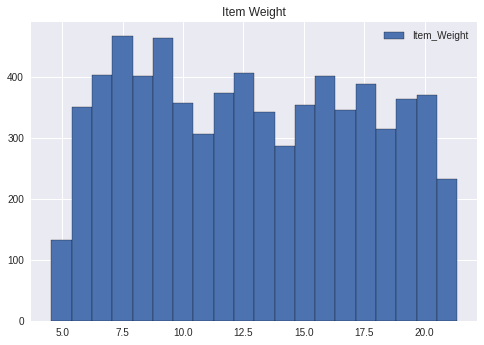

In [65]:
plt.style.use('seaborn')
df['Item_Weight'].hist(bins = 20, edgecolor = 'black', label=['Item_Weight'])
plt.ticklabel_format(useOffset=False, style='plain')
plt.legend(loc='upper right')
plt.title('Item Weight')


#The distribution of Outlet Sales from 1985-2009 is right skewed

In [66]:
#Sort year

df_year = df.sort_values(by=['Outlet_Establishment_Year'])
df_year


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4338,FDH21,NaN,Low Fat,0.031074,Seafood,157.5604,OUT027,1985,Medium,Tier 3,Supermarket Type3,5704.5744
3689,FDD53,NaN,Low Fat,0.044008,Frozen Foods,43.7454,OUT027,1985,Medium,Tier 3,Supermarket Type3,671.1264
1139,FDH26,NaN,Regular,0.034532,Canned,142.2496,OUT027,1985,Medium,Tier 3,Supermarket Type3,2399.5432
1138,FDM21,NaN,Low Fat,0.064052,Snack Foods,256.1646,OUT027,1985,Medium,Tier 3,Supermarket Type3,7472.2734
3691,FDY36,NaN,Low Fat,0.016477,Baking Goods,74.3380,OUT019,1985,Small,Tier 1,Grocery Store,146.4760
...,...,...,...,...,...,...,...,...,...,...,...,...
3600,FDX31,20.35,Regular,0.014886,Fruits and Vegetables,234.4958,OUT018,2009,Medium,Tier 3,Supermarket Type2,3271.7412
5053,NCO53,16.20,Low Fat,0.175898,Health and Hygiene,183.7608,OUT018,2009,Medium,Tier 3,Supermarket Type2,2940.1728
7710,NCR18,15.85,Low Fat,0.020571,Household,41.6112,OUT018,2009,Medium,Tier 3,Supermarket Type2,255.6672
5750,FDV26,20.25,Regular,0.076471,Dairy,196.1794,OUT018,2009,Medium,Tier 3,Supermarket Type2,2731.1116


Text(0.5, 1.0, 'Item Output Sales from 1985-2009')

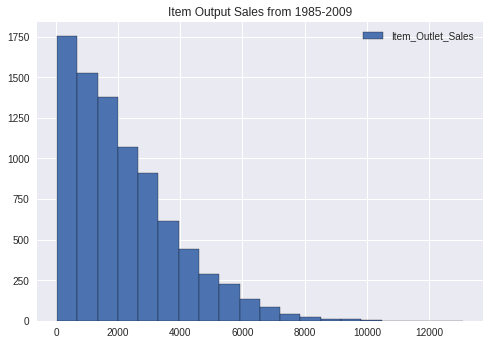

In [67]:
plt.style.use('seaborn')
df['Item_Outlet_Sales'].hist(bins = 20, edgecolor = 'black', label=['Item_Outlet_Sales'])
plt.ticklabel_format(useOffset=False, style='plain')
plt.legend(loc='upper right')
plt.title('Item Output Sales from 1985-2009')

#The graph is positively skewed which means there is lower output sales from 1985 to 2009

Text(0.5, 1.0, 'Maximum Retail Price')

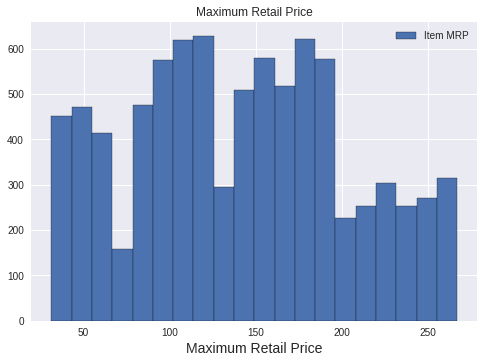

In [68]:
plt.style.use('seaborn')
df['Item_MRP'].hist(bins = 20, edgecolor = 'black', label=['Item MRP'])
plt.ticklabel_format(useOffset=False, style='plain')
plt.legend(loc='upper right')
plt.xlabel('Maximum Retail Price', size = 14)
plt.title('Maximum Retail Price')




#Maximum Retail Price is randomly skewed
#Analysis must be donee separately

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f00df21c850>,
      dtype=object)

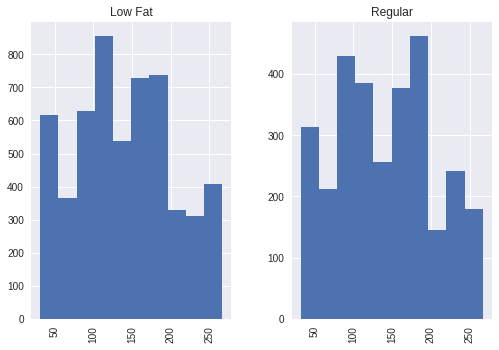

In [69]:
df.hist(column='Item_MRP', by='Item_Fat_Content')

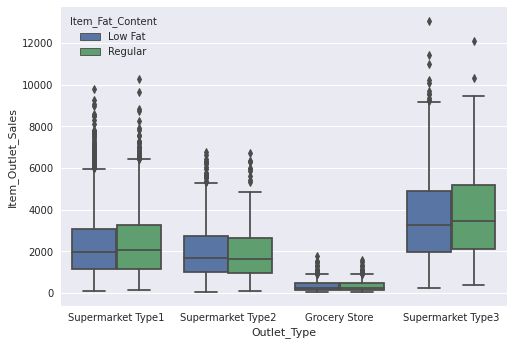

In [70]:
#Creating boxplot comparison


#df.boxplot (by='Outlet_Type', column = ['Item_Outlet_Sales'], grid = False)

sns.set_style("darkgrid")
comparison = sns.boxplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', hue = 'Item_Fat_Content', data = df)


As observed from the graph above, there is higher Outlet Sales in Supermarket Type3.

Grocery Strore has the lowest sales compared to the other Outlet types.

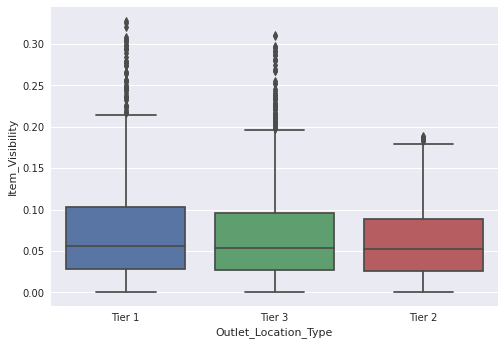

In [71]:
sns.set_style("darkgrid")
comparison = sns.boxplot(x = 'Outlet_Location_Type', y = 'Item_Visibility', data = df)

#No significant difference on the location type in correlation to item visibility.

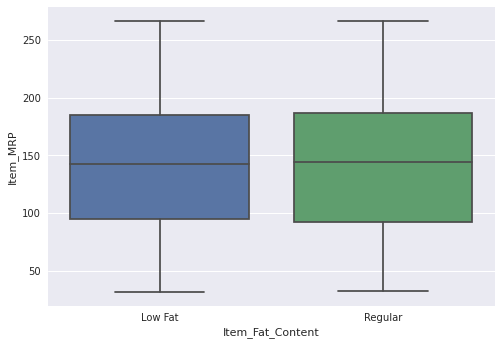

In [72]:
sns.set_style("darkgrid")
comparison = sns.boxplot(x = 'Item_Fat_Content', y = 'Item_MRP', data = df)

#Items with both Low Fat and Regular Fat Content have no siginifcant difference based on average price

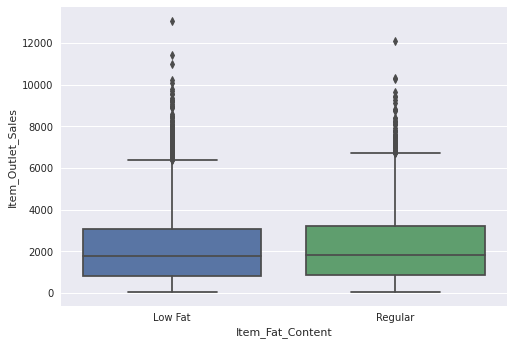

In [73]:
sns.set_style("darkgrid")
comparison = sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = df)


#Sales for Low Fat and Regular are almost the same

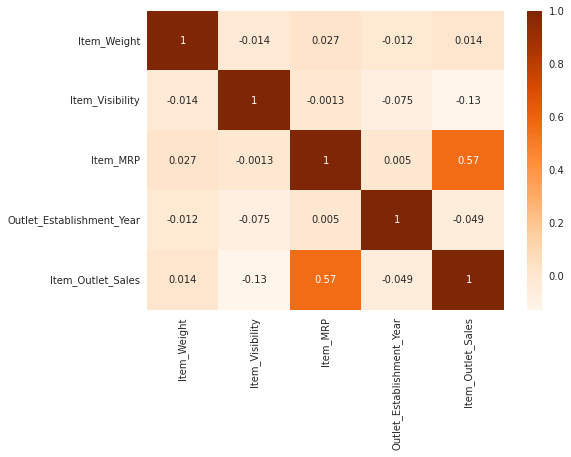

In [74]:
#Update Correlation

corr = df.corr()
sns.heatmap(corr, cmap = 'Oranges', annot=True)


#Item_MRP and Outlet Sales have moderate positive correlation